<a href="https://colab.research.google.com/github/Gaenariya/IPcolab/blob/main/5_%EC%97%AD%EB%B3%80%ED%99%98%2C_%ED%8F%AC%EC%8A%A4%ED%84%B0%EB%9D%BC%EC%9D%B4%EC%A7%95_%EB%93%B1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/gdrive')
import cv2
import matplotlib.pyplot as plt
import numpy as np

Mounted at /content/gdrive


In [6]:
def saturation(val):
  if val > 255:
    return 255
  elif val < 0:
    return 0
  else:
    return val

(269, 256, 3)


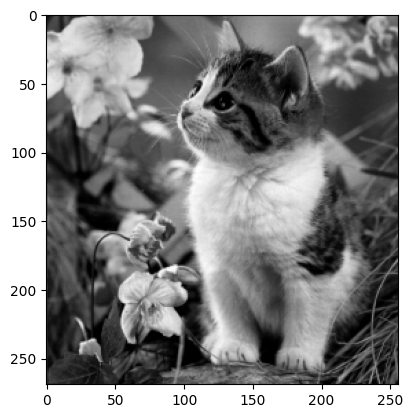

In [5]:
img = cv2.imread('/content/gdrive/My Drive/Images/cat.bmp')
print(img.shape)
gImg1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gImg1, cmap='gray')

In [7]:
gPoint = np.zeros((gImg1.shape[0], gImg1.shape[1]), dtype=np.uint8)

역 변환 실습(반전)


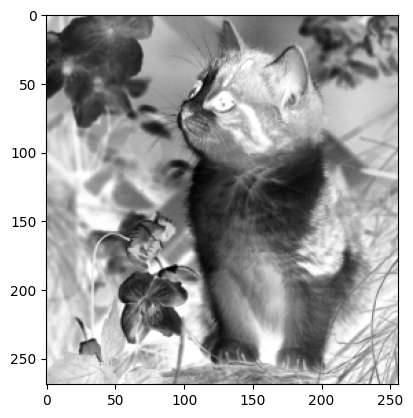

In [9]:
pointVal = np.zeros((gImg1.shape[0], gImg1.shape[1]), dtype=np.int32)
for h in range(gImg1.shape[0]):
  for w in range(gImg1.shape[1]):
    pointVal[h, w] = 255 - np.int32(gImg1[h, w])
    gPoint[h, w] = saturation(pointVal[h, w])

plt.imshow(gPoint, cmap='gray')

이진화(포스터라이징)

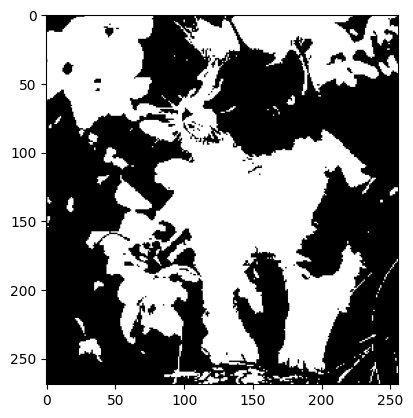

In [10]:
th = 100

pointVal = np.zeros((gImg1.shape[0], gImg1.shape[1]), dtype=np.int32)
for h in range(gImg1.shape[0]):
  for w in range(gImg1.shape[1]):
    if gImg1[h, w] > th:
      pointVal[h, w] = 255
    else:
      pointVal[h, w] = 0
    gPoint[h, w] = saturation(pointVal[h, w])

plt.imshow(gPoint, cmap='gray')

포스터라이징

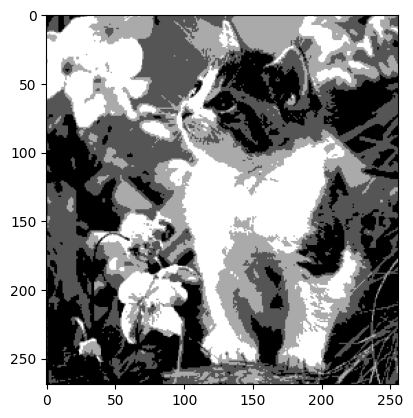

In [16]:
th1 = 50
th2 = 100
th3 = 150
th4 = 200

pointVal = np.zeros((gImg1.shape[0], gImg1.shape[1]), dtype=np.int32)

# 포스터라이징 구간 설정
for h in range(gImg1.shape[0]):
    for w in range(gImg1.shape[1]):
        if gImg1[h, w] <= th1:
            pointVal[h, w] = 0
        elif th1 < gImg1[h, w] <= th2:
            pointVal[h, w] = 85
        elif th2 < gImg1[h, w] <= th3:
            pointVal[h, w] = 170
        else:
            pointVal[h, w] = 255

        # saturation을 적용 (범위 제한)
        gPoint[h, w] = saturation(pointVal[h, w])

# 포스터라이징된 이미지 출력
plt.imshow(gPoint, cmap='gray')
plt.show()


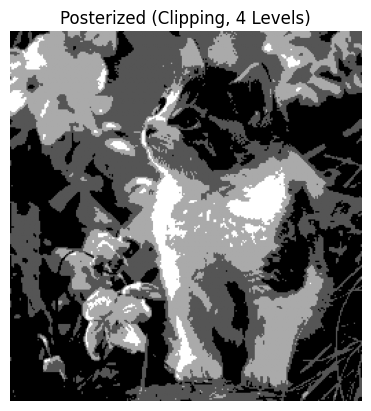

In [17]:
# 결과를 저장할 배열
gPoint = np.zeros((gImg1.shape[0], gImg1.shape[1]), dtype=np.uint8)

for h in range(gImg1.shape[0]):
    for w in range(gImg1.shape[1]):
        pixel = gImg1[h, w]

        # 4레벨 클리핑 포스터라이징
        if pixel < 64:
            val = 0
        elif pixel < 128:
            val = 85
        elif pixel < 192:
            val = 170
        else:
            val = 255

        gPoint[h, w] = saturation(val)  # 혹시 모르니 saturation 함수로 범위 보장

# 출력
plt.imshow(gPoint, cmap='gray')
plt.title('Posterized (Clipping, 4 Levels)')
plt.axis('off')
plt.show()

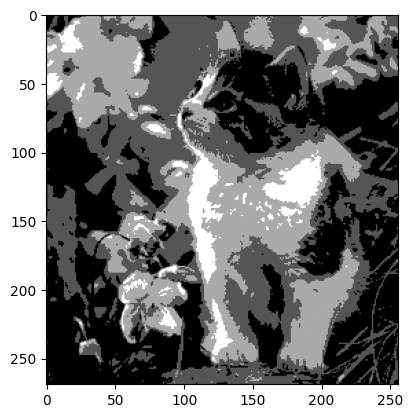

In [19]:
numOfClip = 4
mocVal = 256 / numOfClip
gPoint = np.zeros((gImg1.shape[0], gImg1.shape[1]), dtype=np.uint8)

for h in range(gImg1.shape[0]):
  for w in range(gImg1.shape[1]):
      pointVal = np.int32(gImg1[h, w] / mocVal)
      gPoint[h, w] = saturation(pointVal * mocVal)

plt.imshow(gPoint, cmap='gray')
plt.show()

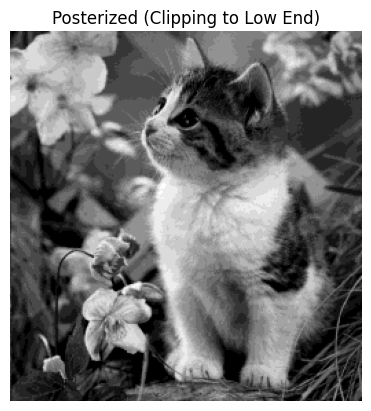

In [25]:
numOfClip = 16
mocVal = 256 / numOfClip  # 64.0

# 반드시 초기화
gPoint = np.zeros((gImg1.shape[0], gImg1.shape[1]), dtype=np.uint8)

for h in range(gImg1.shape[0]):
  for w in range(gImg1.shape[1]):
      pointVal = int(gImg1[h, w] / mocVal)  # 몇 번째 구간인지
      darkVal = int(pointVal * mocVal)      # 그 구간의 하한값 (어둡게)
      gPoint[h, w] = saturation(darkVal)

plt.imshow(gPoint, cmap='gray')
plt.title('Posterized (Clipping to Low End)')
plt.axis('off')
plt.show()
